In [34]:
import numpy as np
from numpy import pi
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
account = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q-education")

ibmqfactory.load_account:WARNING:2022-11-08 14:07:40,294: Credentials are already in use. The existing account in the session will be replaced.


In [21]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session
service = QiskitRuntimeService()

# Quantum Fourier Transform Implementation
## Circuit python coding

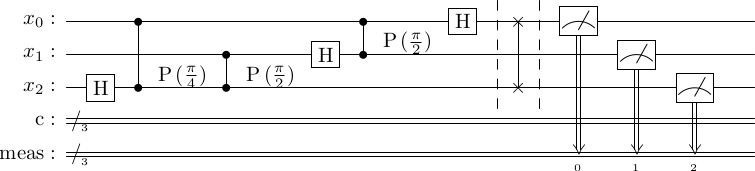

In [61]:
N=3

def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)


def swap_registers(circuit, n):
    circuit.barrier()
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

qc = QuantumCircuit(QuantumRegister(N,'x'),ClassicalRegister(N,'c'))
qft(qc,N)
qc.measure_all()
qc.draw(output='latex')


## Simulations

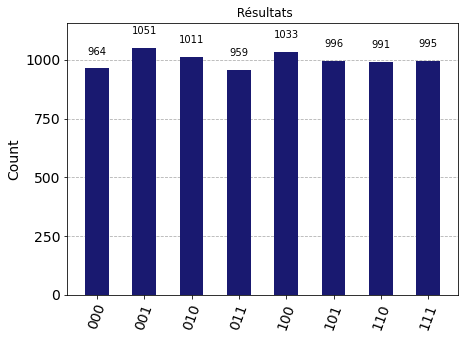

In [58]:
#With the classical IBMQ
backend = provider.get_backend('ibmq_qasm_simulator')
job = backend.run(qc,shots=1024)
results = job.result()
counts = results.get_counts()
fig_hist = plot_histogram(counts, color='midnightblue', title=" Résultats")
display(fig_hist)

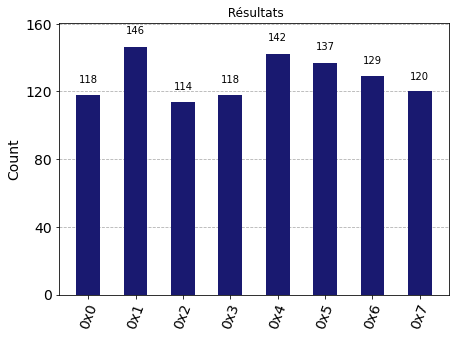

In [52]:
#With Qiskit Runtime
options = {'backend_name': 'ibmq_qasm_simulator'}
runtime_inputs = {'circuits': qc}
with Session(service=service, backend="ibmq_qasm_simulator") as session:
    job = service.run(program_id='circuit-runner',options=options,inputs=runtime_inputs)
    print(f"Job ID is {job.job_id()}")
    print(f"Job result is {job.result()}")
    results = job.result()
    counts = results["results"][0]["data"]["counts"]
    fig_hist = plot_histogram(counts, color='midnightblue', title=" Résultats")
    display(fig_hist)

## Execution on QPU

In [55]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-education', group='ensea-1', project='info-quantique')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-education', group='ensea-1', project='info-quantique')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-education', group='ensea-1', project='info-quantique')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-education', group='ensea-1', project='info-quantique')>,
 <IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-education', group='ensea-1', project='info-quantique')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-education', group='ensea-1', project='info-quantique')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-education', group='ensea-1', project='info-quantique')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-education', group='ensea-1', project='info-quantique')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q-education', group='ensea-1', project='info-quantique')>,
 <IBMQSimulat

# Execution sur ibm_oslo

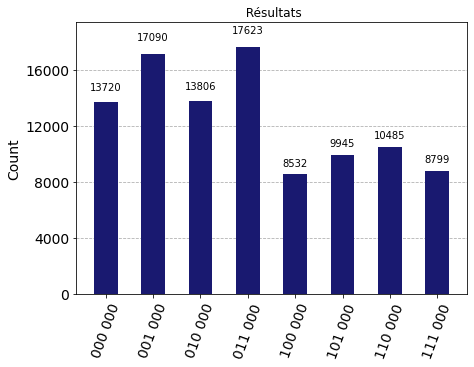

In [70]:
#With the classical IBMQ
backend_name = 'ibm_oslo'
backend = provider.get_backend(backend_name)
transpiled_qc = transpile(qc,backend=backend)
qjob = backend.run(transpiled_qc,shots=100000,memory=True)
qresults = qjob.result()
qcounts = qresults.get_counts()
fig_hist = plot_histogram(qcounts, color='midnightblue', title=" Résultats")
transpiled_qc.draw(output="latex")
display(fig_hist)

#Execution sur 

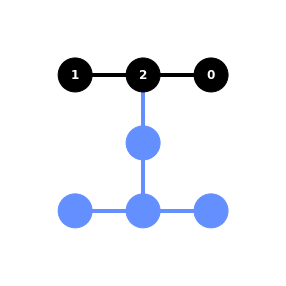

In [71]:
plot_circuit_layout(transpiled_qc,backend)

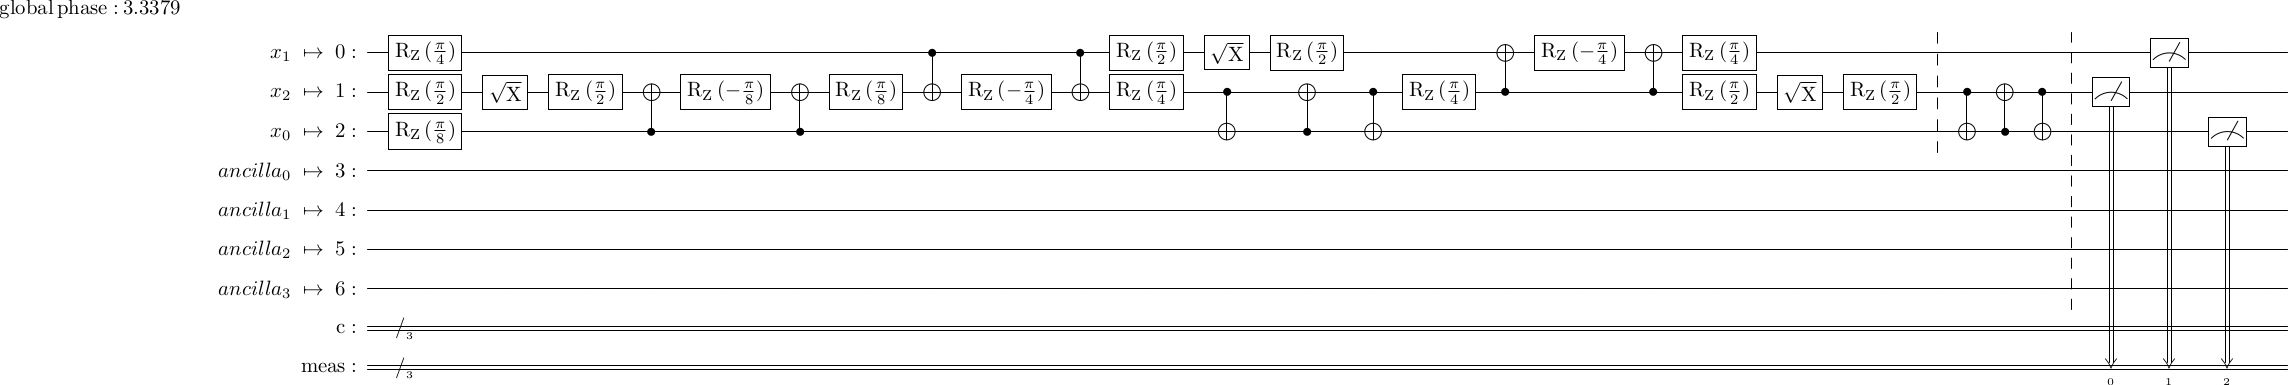

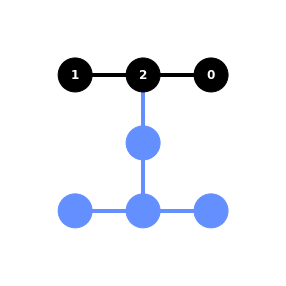

In [73]:
display(transpiled_qc.draw(output="latex"),plot_circuit_layout(transpiled_qc,backend))